In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import dask
import dask.dataframe as dd
df = dd.read_csv('explored_ds.csv')

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask.array as da

In [4]:
df_fast = df.sample(frac=0.001, random_state = 1).compute()

In [6]:
# Allocating columns
category_vars = ["Label", "Protocol","SYN Flag Cnt", "RST Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "CWE Flag Count", "ECE Flag Cnt", "dst_port_transformed", "src_port_transformed"]
object_vars = ['Dst IP', 'Src IP'] #df.select_dtypes(include=['object']).columns
continuous_vars = df.columns[~df.columns.isin(category_vars) & ~df.columns.isin(object_vars)]

## Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df_fast[continuous_vars].values)

## PCA - df_fast

*Prining Compoments Composition*

Um eine gute Anzahl von Prinicpal Components zu ermitteln, haben wir uns 50 Stück berechnet und mit jeder neuen Principal Componenet eine logistische Regression berechnet. Die Accuracy wird mit der Anzahl der Komponenten visuell dargestellt. Es lassen sich zwei Knicke feststellen. Der zweite Sprung ist aber zu minimal, dafür dass wir fast 25 neue Komponenten berücksichtigen müssen. Unsere Wahl fällt auf 10 Komponenten.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [20]:
scores = []
pca = PCA(n_components="mle") #mle
principalComponents = pca.fit_transform(x)

# Create Column Names
col_names = []
for i in range(principalComponents.shape[1]):
    col_names.append(f"PC-{i}")

principalDf = pd.DataFrame(data = principalComponents, columns = col_names)
finalDf = pd.concat([principalDf, df_fast[['Label']].reset_index()["Label"]], axis = 1)

train, test, train_lbl, test_lbl = train_test_split(finalDf[col_names[:i+1]], finalDf[["Label"]].reset_index()["Label"], test_size=1/7.0, random_state=0)

for i in range(finalDf.shape[1]):
    logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10)
    logisticRegr.fit(train, train_lbl)
    scores.append(logisticRegr.score(test, test_lbl))

KeyboardInterrupt: 

[Text(0.5, 0, 'Number of first x Components'), Text(0, 0.5, 'Accuracy')]

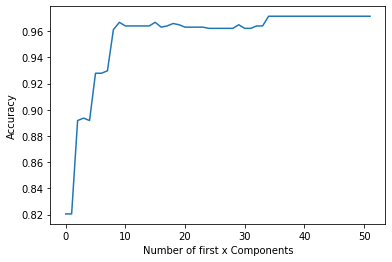

In [12]:
axes = sns.lineplot(data=scores)
axes.set(xlabel = "Number of first x Components", ylabel = "Accuracy")

## PCA - df

In [14]:
x = StandardScaler().fit_transform(df[continuous_vars].values)

c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\dask\array\core.py:1514: FutureWarning: The `numpy.may_share_memory` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


In [15]:
pca = PCA(n_components="mle") #mle
principalComponents = pca.fit_transform(x)

In [16]:
col_names = []
for i in range(principalComponents.shape[1]):
    col_names.append(f"PC-{i}")
principalDf = pd.DataFrame(data = principalComponents, columns = col_names)

In [17]:
a = df["Label"].compute()

In [18]:
finalDf = pd.concat([principalDf, a.reset_index()["Label"]], axis = 1)

In [19]:
scores = []
for i in range(finalDf.shape[1]):
    train, test, train_lbl, test_lbl = train_test_split(finalDf[col_names[:i+1]], finalDf[["Label"]].reset_index()["Label"], test_size=1/7.0, random_state=0)
    
    logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10)
    logisticRegr.fit(train, train_lbl)
    scores.append(logisticRegr.score(test, test_lbl))

c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Traceback (most recent call last):
  File "c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-d947c46f632f>", line 6, in <module>
    logisticRegr.fit(train, train_lbl)
  File "c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\sklearn\linear_model\_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\sklearn\utils\multiclass.py", line 180, in check_classification_targets
    y_type = type_of_target(y)
  File "c:\users\basti\documents\coding\python-venv\data-exploration-project\lib\site-packages\sklearn\utils\multiclass.py", line 306, in type_of_target
    if (len(np.unique(y)) > 2) or (y.ndim >= 2 and len(y[0]) > 1):
  File "<__array_function__ internals>", line 5, in un

TypeError: object of type 'NoneType' has no len()

In [ ]:
axes = sns.lineplot(data=scores)
axes.set(xlabel = "Number of first x Components", ylabel = "Accuracy", title  = "Complete Data set")

## One hot encoding

## Save DF in new CSV